##  Breast Cancer Wisconsin (Diagnostic) Dataset:
Commonly referred to as the Wisconsin Breast Cancer Dataset or WBCD. It is a widely used dataset in machine learning for binary classification tasks, particularly for predicting whether a tumor is malignant (M) or benign (B) based on features computed from digitized images of fine needle aspirates (FNA) of breast masses.

### Key Features of the Dataset:

- Target Variable:
1) diagnosis: The target variable, which indicates whether the tumor is malignant (M) or benign (B).

- Features:
The dataset contains 30 features computed from the digitized images. These features describe characteristics of the cell nuclei present in the image, such as:

1) radius_mean: Mean radius of the nuclei.

2) texture_mean: Mean texture (standard deviation of gray-scale values).

3) perimeter_mean: Mean perimeter of the nuclei.

4) area_mean: Mean area of the nuclei.

5) smoothness_mean: Mean smoothness (local variation in radius lengths).

6) compactness_mean: Mean compactness (perimeter² / area - 1.0).

7) concavity_mean: Mean concavity (severity of concave portions of the contour).

8) concave points_mean: Mean number of concave portions of the contour.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\Breast Cancer Wisconsin (Diagnostic) Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.shape

(569, 33)

In [12]:
# Summarize the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.drop(columns=['Unnamed: 32','id'], inplace = True)

In [20]:
# Check null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# No null values are present.

In [14]:
# Check Labels/Targets in Dataset.
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

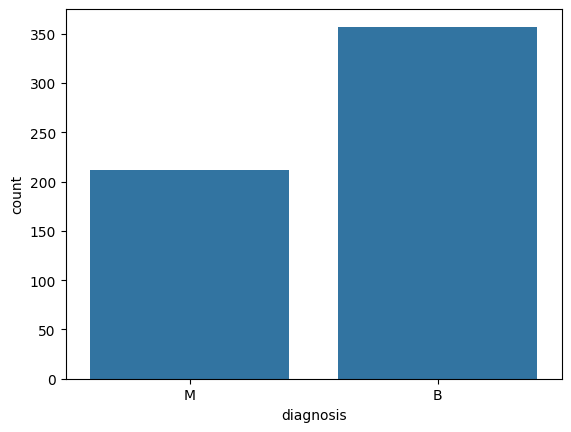

In [8]:
# Plot diagnosis in counterplot

sns.countplot(x='diagnosis',data=df)
plt.show()

In [22]:
# ML models do not understand high level language so we have to convert catergorical values to numerical values.

df['diagnosis'] = df['diagnosis'].replace({'M':0,'B':1})

C:\Users\sharm\AppData\Local\Temp\ipykernel_45992\51036030.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis']=df['diagnosis'].replace({'M':0,'B':1})


In [24]:
# Split features and labels

x = df.drop('diagnosis',axis=1)
y = df.diagnosis

## ANOVA f-test
The ANOVA F-test is a statistical method used to compare the means of two or more groups to determine if they are significantly different from each other.

### In Feature Selection:
In machine learning, the ANOVA F-test is used to select features that are most relevant to the target variable.

- It tests the relationship between each feature and the target:

1) Null Hypothesis (H₀): The feature has no effect on the target (means are the same across groups).

2) Alternative Hypothesis (H₁): The feature has a significant effect on the target (means are different across groups).

Features with high F-scores are considered important because they have a stronger relationship with the target.

### Example:
If you're predicting house prices:

The ANOVA F-test can tell you whether features like square footage, number of bedrooms, or location significantly affect the price.

In [26]:
from sklearn.feature_selection import SelectKBest,f_classif

In [30]:
# SelectKBest is a feature selection method from sklearn. It selects the top k features based on a scoring function.
# score_func = f_classif uses the ANOVA F-test (used for classification tasks) to evaluate the relationship between each feature and the target variable.
# k=14 specifies that the top 14 features will be selected.

select_feature = SelectKBest(score_func = f_classif, k=14)

# The fit method computes the scores for each feature in x (features) based on their relationship with y (target variable).
# using the ANOVA F-test.
fit = select_feature.fit(x,y) 

# fit.scores_ retrieves the computed scores for each feature.
score = pd.DataFrame(fit.scores_)

# It retrieves the names of the features (columns) in the feature matrix x.
column = pd.DataFrame(x.columns)

In [34]:
# Combines the two DataFrames (column and score) column-wise (axis=1).
best_feature = pd.concat([column,score],axis=1)

# Rename the columns of the best_feature
best_feature.columns = ['Feature','Score']

# Retrieves the top 30 rows from the best_feature determined using ANOVA f-test.
print(best_feature.nlargest(30,'Score'))

                    Feature       Score
27     concave points_worst  964.385393
22          perimeter_worst  897.944219
7       concave points_mean  861.676020
20             radius_worst  860.781707
2            perimeter_mean  697.235272
23               area_worst  661.600206
0               radius_mean  646.981021
3                 area_mean  573.060747
6            concavity_mean  533.793126
26          concavity_worst  436.691939
5          compactness_mean  313.233079
25        compactness_worst  304.341063
10                radius_se  268.840327
12             perimeter_se  253.897392
13                  area_se  243.651586
21            texture_worst  149.596905
24         smoothness_worst  122.472880
28           symmetry_worst  118.860232
1              texture_mean  118.096059
17        concave points_se  113.262760
4           smoothness_mean   83.651123
8             symmetry_mean   69.527444
29  fractal_dimension_worst   66.443961
15           compactness_se   53.247339


In [37]:
new_df=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','texture_worst','smoothness_worst','symmetry_worst','texture_mean','concave points_se']]

In [39]:
new_df

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,17.33,0.16220,0.4601,10.38,0.01587
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,23.41,0.12380,0.2750,17.77,0.01340
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,25.53,0.14440,0.3613,21.25,0.02058
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,26.50,0.20980,0.6638,20.38,0.01867
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,16.67,0.13740,0.2364,14.34,0.01885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,26.40,0.14100,0.2060,22.39,0.02454
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,38.25,0.11660,0.2572,28.25,0.01678
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,34.12,0.11390,0.2218,28.08,0.01557
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772,39.42,0.16500,0.4087,29.33,0.01664


In [41]:
# Import model

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
scaler = StandardScaler()


x_scaled = scaler.fit_transform(new_df) # It contains the vest features

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, random_state = 0, test_size = 0.25)

In [63]:
# Lets make one function and use every time for checking test score and train score.

def metric_score(model, xtrain, xtest, ytrain, ytest, train = True):
    if train:
        ypred_train = dtc.predict(xtrain)
        print('=============== Train Test===============')
        print(f"Accuracy Score: {accuracy_score(ytrain, ypred_train)*100:.2f}%")
    else:
        ypred_test = dtc.predict(xtest)
        print('=============== Train Test===============')
        print(f"Accuracy Score: {accuracy_score(ytest, ypred_test)*100:.2f}%")

        print("\nClassification Report:\n", classification_report(ytest, ypred_test, digits=2))

In [53]:
dtc = DecisionTreeClassifier()

In [55]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [65]:
# Check For test Score

metric_score(dtc, xtrain, xtest, ytrain, ytest, train = False)

=============== Train Test===============
Accuracy Score: 90.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        53
           1       0.96      0.89      0.92        90

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.90       143
weighted avg       0.92      0.91      0.91       143



## Cross-Validation
Cross-validation is a technique used to evaluate the performance of a machine learning model. Suppose you train a model on a given dataset using a specific algorithm. You then evaluate the accuracy of the trained model using the same training data and find it to be 95% or even 100%. Does this mean your model is ready for prediction? The answer is no.

### Why?
Because your model has trained itself on the given data. In other words, it "knows" the data it was trained on. When tested on a new dataset (data it has never seen before), it is likely to perform poorly because it fails to generalize well. This issue is known as overfitting. To address this problem, cross-validation comes into play.

### What is Cross-Validation?
Cross-validation is a resampling technique that involves dividing the training dataset into two parts:

- Training Set: Used to train the model.

- Testing Set: Used to evaluate the model's performance on unseen data.

You train the model on one part (training set) and make predictions on the other part (testing set) to check how well the model performs. If the model achieves good accuracy on the test data, it indicates that the model has not overfitted the training data and can be trusted for predictions. On the other hand, if it performs poorly on the test data, it means the model cannot be trusted, and you may need to tweak your algorithms or adjust the model.

### The Problem with Simple Train-Test Split
In a simple train-test split, some data points (e.g., the red-colored ones in the diagram) may appear in both the training and testing sets. In such cases, there is a possibility that your model is overfitted because it has already seen this data during training. If some of this data exists in the test set, the model might achieve an accuracy of 95%, 93%, or even 100%. This does not reflect the model's true ability to generalize to unseen data.

### Why Not Use Cross-Validation Every Time?
When training a model, we typically have one training set and one testing set. For example, let’s assume it takes 5 hours to train a large dataset (and it literally takes this much time). During training, the algorithm needs to identify patterns and learn from the data. If we add more features or increase the size of the dataset, the training time increases significantly.

In the case of k-fold cross-validation, we need to evaluate the model multiple times based on the number of folds (the value of "k"). For instance, if we set k = 5 and training one set of data takes 5 hours, then training and testing across 5 folds will take 5 × 5 = 25 hours. You can imagine how much computational time and cost this requires.

### Cost Example:
If 1 hour costs 250, then 25 hours would cost 6250. Even if you are wealthy, the problem goes beyond cost. In real-world projects, you often need to train the model multiple times because the data or the model parameters may need adjustments. If the results are unsatisfactory, you may need to retrain the model repeatedly, which consumes more time and resources.

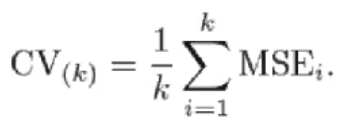

### K-Fold Cross-Validation
In k-fold cross-validation, the dataset is divided into k groups or subsets. The data is split depending on the number of groups (k) you specify. Each subset is used as a test set once, while the remaining data is used for training. The variance in error decreases with the increase in k. However, the advantage of k-fold cross-validation comes at the cost of computational expense, as the algorithm runs from scratch fork times.

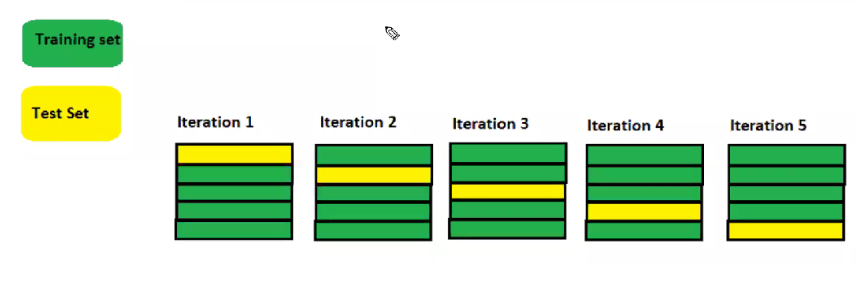

- Let’s break it down:
1) When we say "cross-validation = 5," it means the dataset is divided into 5 folds, and there will be 5 iterations in total.

2) The value of K represents the number of folds, so in this case, it’s 5 folds.

3) How does it work?
The dataset is split into K equal parts (e.g., for 5-fold cross-validation, the data is divided into 5 subsets or folds).

4) The model is trained and tested K times.

5) In each iteration, one fold is used as the testing dataset, and the remaining K-1 folds are used as the training dataset.

- For example, in a 5-fold cross-validation:
1) During the 1st iteration, the first fold is used for testing, and the remaining four folds are used for training.

2) During the 2nd iteration, the second fold is used for testing, and the rest are used for training.

3) This process is repeated until each fold has been used as the testing dataset exactly once.

### Leave-One-Out Cross-Validation (LOOCV)

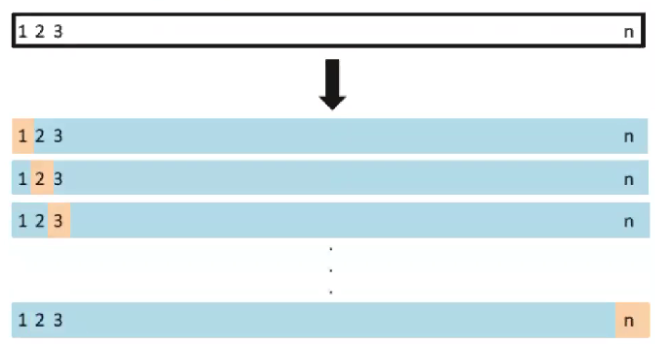

In Leave-One-Out Cross-Validation (LOOCV), the process works as follows:

Let’s say you have 100 records. In LOOCV, for the first iteration, 99 records are used for training, and the first record is used for testing. In the second iteration, the second record is used for testing, while the remaining 99 records are used for training.

This process repeats 100 times (equal to the total number of records). Each iteration produces an accuracy score. At the end of the process, the average of all these accuracy scores is calculated to evaluate the model’s performance.

### Comparison to K-Fold Cross-Validation:
In k-fold cross-validation, the dataset is divided into k groups or subsets. Each subset is used as a test set once, while the remaining data is used for training.

In LOOCV, the number of folds (k) equals the number of records (n). Instead of grouping the data into subsets, LOOCV selects a single observation as the test data and uses the rest for training.

### Efficiency and Practicality:
Although LOOCV provides excellent accuracy, it is computationally expensive, especially with large datasets. This is why its use is rare, as it requires significant time and resources. While LOOCV can be effective for small datasets or when accuracy is critical, it’s less practical for large-scale applications

In [71]:
# Kfold method

from sklearn.model_selection import KFold, cross_val_score

In [73]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [75]:
# Use the split method of a k-fold cross-validation object (kf) to divide the dataset into training and testing sets for each fold.

for train, test in kf.split(new_df):
    print('Train: ', train, 'Test: ', test)

Train:  [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 35

## Cross Validation score to check if the model is overfitting

- Score Metric:

1) By default, cross_val_score uses the model's default scoring metric (e.g., accuracy for classification, R² for regression).

2) You can specify a different scoring metric using the scoring parameter (e.g., scoring='f1' for F1-score).

In [80]:
print(cross_val_score(dtc,x_scaled,y,cv=5))

[0.90350877 0.92982456 0.94736842 0.95614035 0.92920354]


This means the model's score (e.g., accuracy) was computed for each of the 5 folds:

Fold 1: 0.92 (92% accuracy)

Fold 2: 0.89 (89% accuracy)

Fold 3: 0.91 (91% accuracy)

Fold 4: 0.90 (90% accuracy)

Fold 5: 0.88 (88% accuracy)

These scores represent the model's performance on unseen data for each fold.



In [88]:
cv_score = cross_val_score(dtc,x_scaled,y,cv=5)
print(cv_score.mean())

0.924437199192672
